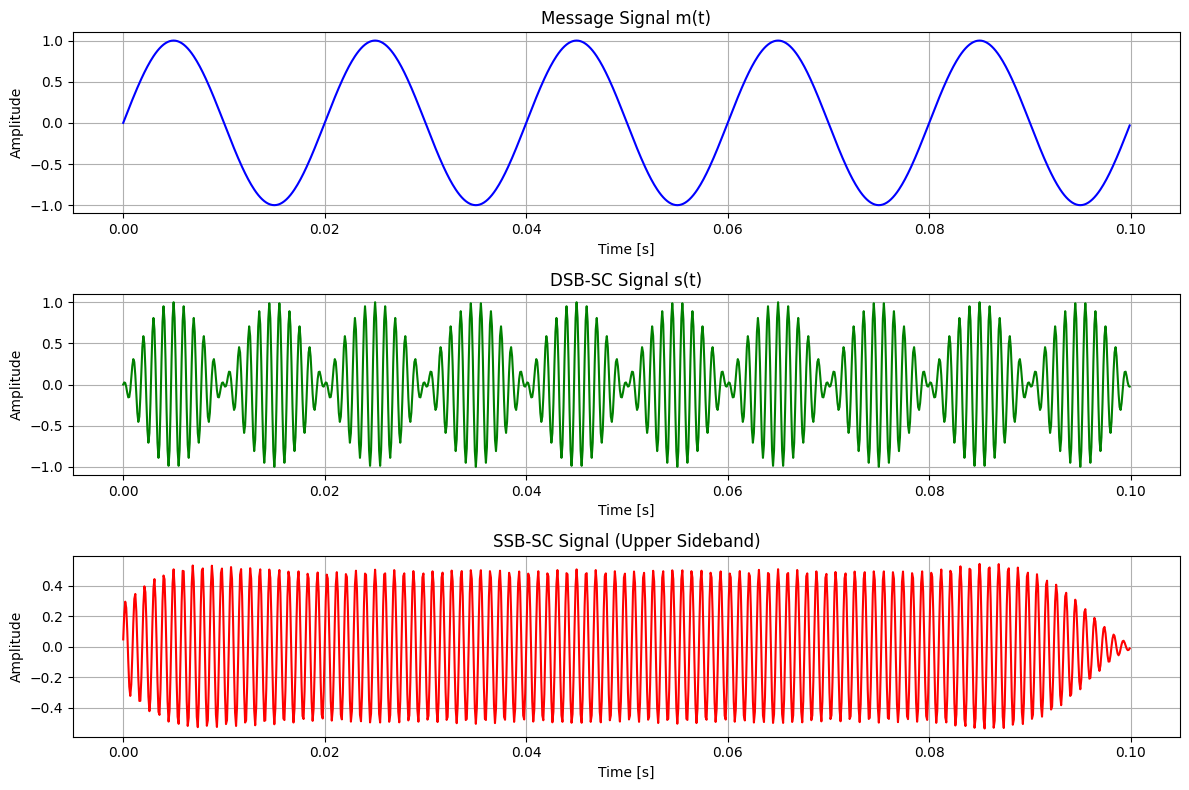

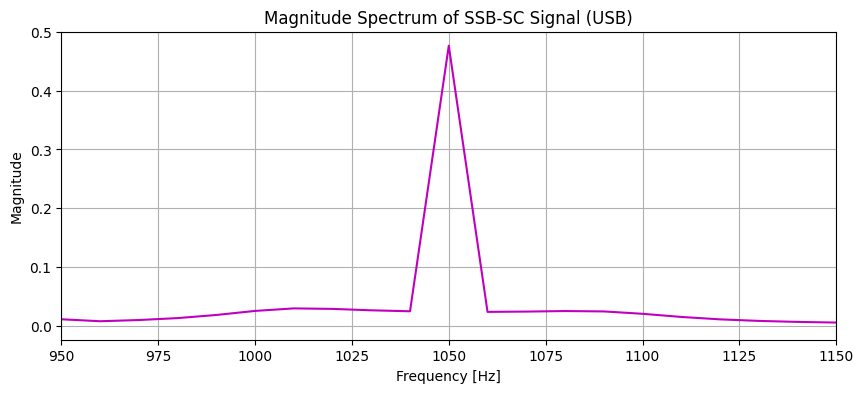

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Sampling parameters
Fs = 10000               # Sampling frequency (Hz)
T = 0.1                  # Duration of signal (seconds)
t = np.arange(0, T, 1/Fs)

# Message signal
Am = 1
fm = 50
m_t = Am * np.sin(2 * np.pi * fm * t)

# Carrier signal
Ac = 1
fc = 1000
c_t = Ac * np.cos(2 * np.pi * fc * t)

# Generate DSB-SC signal
s_dsbsc = m_t * c_t  # Suppressed carrier

# Design band-pass filter to select upper sideband (USB)
lowcut = fc           # Hz
highcut = fc + 2*fm   # Hz

# Butterworth bandpass filter
order = 3
b, a = butter(order, [lowcut/(Fs/2), highcut/(Fs/2)], btype='band')
s_usb = filtfilt(b, a, s_dsbsc)

# Plot time-domain signals
plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
plt.plot(t, m_t, 'b', linewidth=1.5)
plt.title('Message Signal m(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t, s_dsbsc, 'g', linewidth=1.5)
plt.title('DSB-SC Signal s(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, s_usb, 'r', linewidth=1.5)
plt.title('SSB-SC Signal (Upper Sideband)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Frequency-domain analysis
N = len(s_usb)
S_f = np.fft.fft(s_usb)/N
f = np.fft.fftfreq(N, 1/Fs)
f_pos = f[:N//2]
S_f_pos = 2 * np.abs(S_f[:N//2])

plt.figure(figsize=(10,4))
plt.plot(f_pos, S_f_pos, 'm', linewidth=1.5)
plt.title("Magnitude Spectrum of SSB-SC Signal (USB)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim(fc-50, fc+2*fm+50)  
plt.show()


### Demodulation

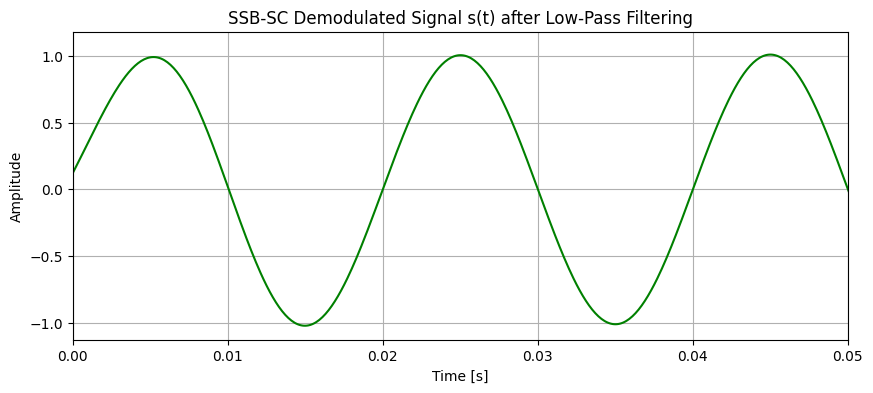

In [2]:
from scipy.signal import butter, filtfilt

demod_1 = s_usb * c_t  

# Butterworth low-pass filter design
order = 4
nyq = 0.5 * Fs
normal_cutoff = (2 * fm) / nyq

b, a = butter(order, normal_cutoff, btype='low', analog=False)
filtered = filtfilt(b, a, demod_1) * 4

plt.figure(figsize=(10, 4))
plt.plot(t, filtered, 'g', linewidth=1.5)
plt.title('SSB-SC Demodulated Signal s(t) after Low-Pass Filtering')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05)
plt.grid(True)
plt.show()

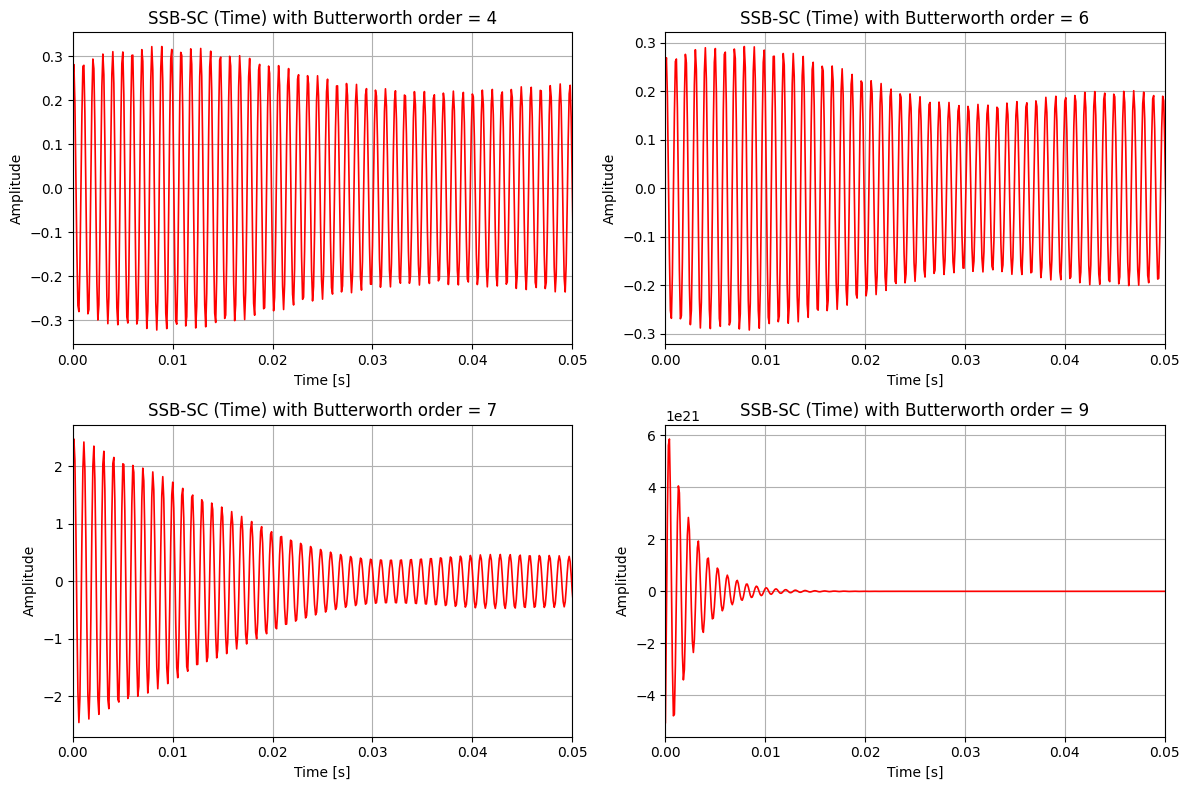

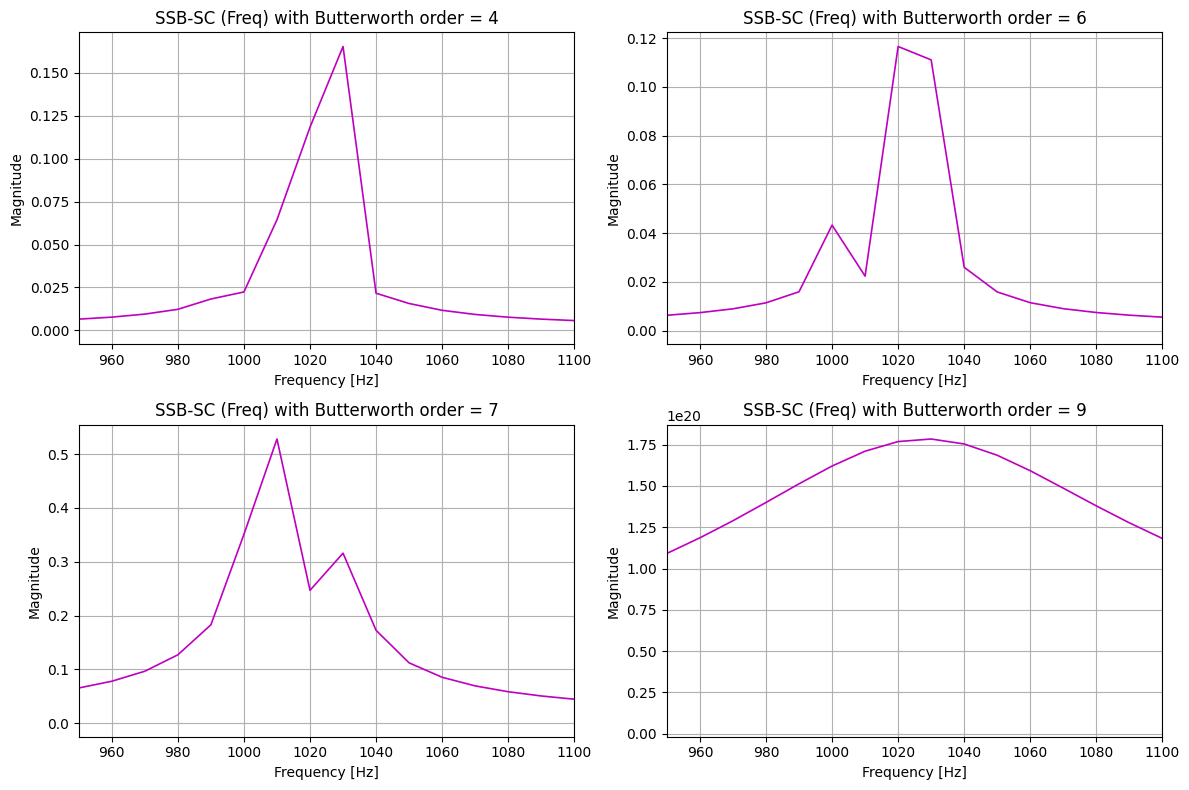

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Sampling parameters
Fs = 10000
T = 0.1
t = np.arange(0, T, 1/Fs)

# Message signal
Am = 1
fm = 30   # message frequency
m_t = Am * np.sin(2 * np.pi * fm * t)

# Carrier
Ac = 1
fc = 1000  # carrier frequency
c_t = Ac * np.cos(2 * np.pi * fc * t)

# Generate DSB-SC signal
s_dsbsc = m_t * c_t

# Narrow band-pass filter to isolate upper sideband
lowcut = fc
highcut = fc + fm  # only upper sideband

orders = [4, 6, 7, 9]

# --- Time-Domain Plots ---
plt.figure(figsize=(12, 8))
for i, order in enumerate(orders):
    b, a = butter(order, [lowcut/(Fs/2), highcut/(Fs/2)], btype='band')
    s_ssb = filtfilt(b, a, s_dsbsc)
    
    plt.subplot(2,2,i+1)
    plt.plot(t, s_ssb, 'r', linewidth=1.2)
    plt.title(f'SSB-SC (Time) with Butterworth order = {order}')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.xlim(0, 0.05)  # zoom to see waveform clearly

plt.tight_layout()
plt.show()

# --- Frequency-Domain Plots ---
plt.figure(figsize=(12, 8))
for i, order in enumerate(orders):
    b, a = butter(order, [lowcut/(Fs/2), highcut/(Fs/2)], btype='band')
    s_ssb = filtfilt(b, a, s_dsbsc)
    
    N = len(s_ssb)
    S_f = np.fft.fft(s_ssb)/N
    f = np.fft.fftfreq(N, 1/Fs)
    f_pos = f[:N//2]
    S_f_pos = 2*np.abs(S_f[:N//2])
    
    plt.subplot(2,2,i+1)
    plt.plot(f_pos, S_f_pos, 'm', linewidth=1.2)
    plt.title(f'SSB-SC (Freq) with Butterworth order = {order}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(fc-50, fc+100)  # zoom around upper sideband for clarity

plt.tight_layout()
plt.show()


### SSB SC using Phase Method

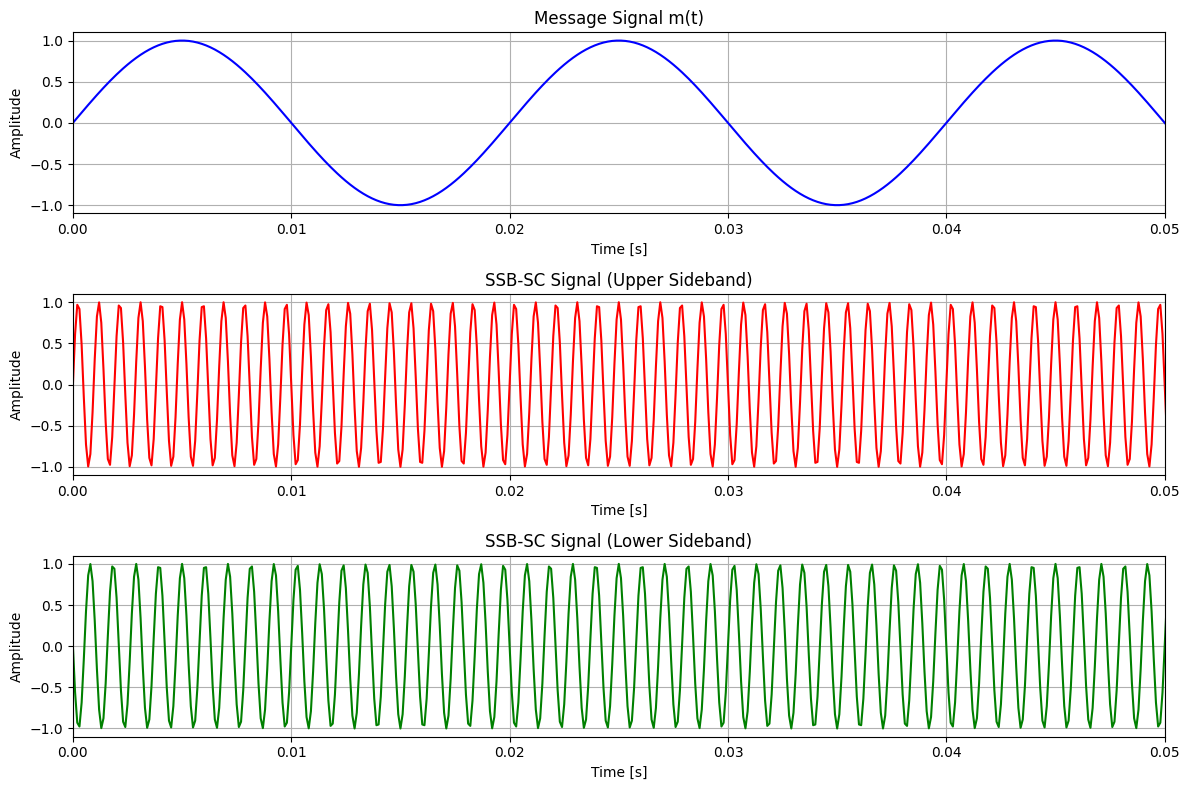

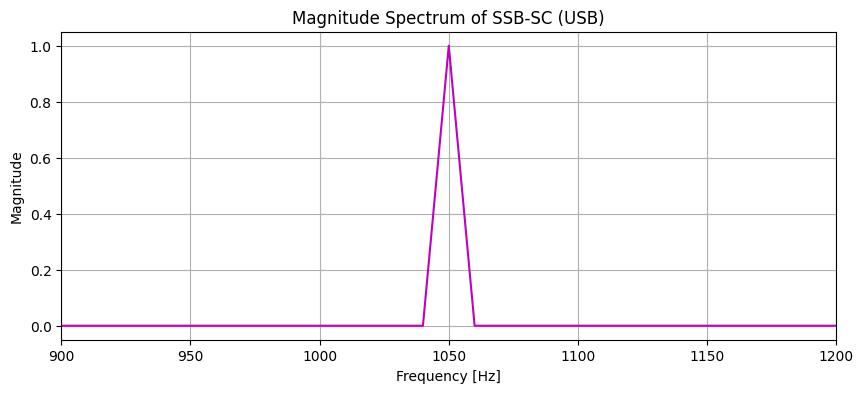

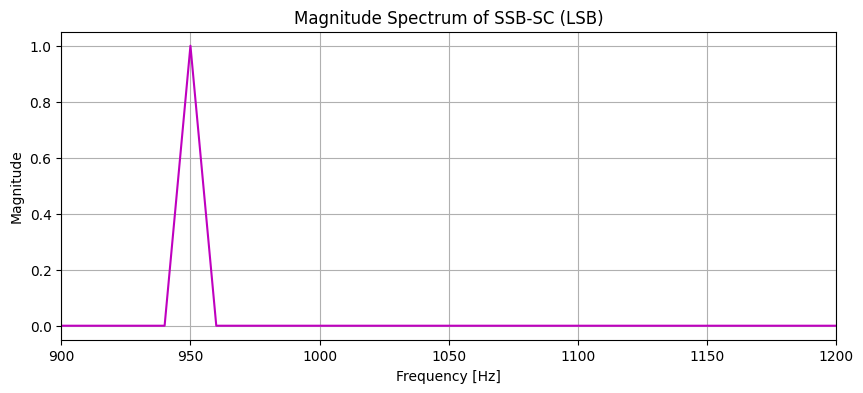

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Sampling Parameters
Fs = 10000                  # Sampling frequency (Hz)
T = 0.1                     # Duration of signal (s)
t = np.arange(0, T, 1/Fs)   # Time vector

# Message Signal (Baseband)
Am = 1                                  # Message amplitude
fm = 50                                 # Message frequency
m_t = Am * np.sin(2 * np.pi * fm * t)   # Baseband signal

# Carrier Signal
fc = 1000                             # Carrier frequency
c_cos = np.cos(2 * np.pi * fc * t)    # In-phase carrier
c_sin = np.sin(2 * np.pi * fc * t)    # Quadrature carrier (90° phase shift)

# Hilbert Transform of Message
m_hilbert = np.imag(hilbert(m_t))

# Upper Sideband (USB)
s_usb = m_t * c_cos - m_hilbert * c_sin

# Lower Sideband (LSB)
s_lsb = m_t * c_cos + m_hilbert * c_sin

# Time-Domain Plots
plt.figure(figsize=(12, 8))

plt.subplot(3,1,1)
plt.plot(t, m_t, 'b', linewidth=1.5)
plt.title('Message Signal m(t)')
plt.xlabel('Time [s]')
plt.xlim(0, 0.05)
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t, s_usb, 'r', linewidth=1.5)
plt.title('SSB-SC Signal (Upper Sideband)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05)
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, s_lsb, 'g', linewidth=1.5)
plt.title('SSB-SC Signal (Lower Sideband)')
plt.xlabel('Time [s]')
plt.xlim(0, 0.05)
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Frequency-Domain Analysis
def plot_spectrum(signal, title, Fs):
    N = len(signal)
    S_f = np.fft.fft(signal)/N
    f = np.fft.fftfreq(N, 1/Fs)
    f_pos = f[:N//2]
    S_f_pos = 2 * np.abs(S_f[:N//2])
    
    plt.figure(figsize=(10,4))
    plt.plot(f_pos, S_f_pos, 'm', linewidth=1.5)
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(fc - 100, fc + 200)  
    plt.show()

# Plot spectra
plot_spectrum(s_usb, 'Magnitude Spectrum of SSB-SC (USB)', Fs)
plot_spectrum(s_lsb, 'Magnitude Spectrum of SSB-SC (LSB)', Fs)


### Demodulation

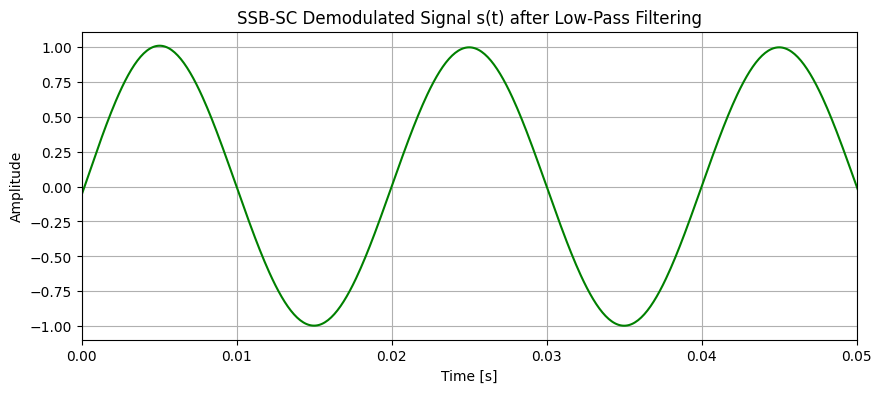

In [5]:
from scipy.signal import butter, filtfilt

demod_1 = s_usb * c_t  

# Butterworth low-pass filter design
order = 4
nyq = 0.5 * Fs
normal_cutoff = (2 * fm) / nyq

b, a = butter(order, normal_cutoff, btype='low', analog=False)
filtered = filtfilt(b, a, demod_1) * 2

plt.figure(figsize=(10, 4))
plt.plot(t, filtered, 'g', linewidth=1.5)
plt.title('SSB-SC Demodulated Signal s(t) after Low-Pass Filtering')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05)
plt.grid(True)
plt.show()

### SSB-SC Synchronous Demodulation (Final Lab Section)

In SSB-SC demodulation, the received sideband signal is multiplied by a phase-synchronized local carrier to shift the message back to baseband. A low-pass Butterworth filter removes high-frequency terms, and scaling/offset correction recovers the message amplitude for comparison.


SSB-SC Synchronous Demodulation Metrics:
LPF cutoff = 350 Hz, Filter order = 4
Scaling factor = 2.0000
MSE = 0.00001210
Correlation = 1.0000


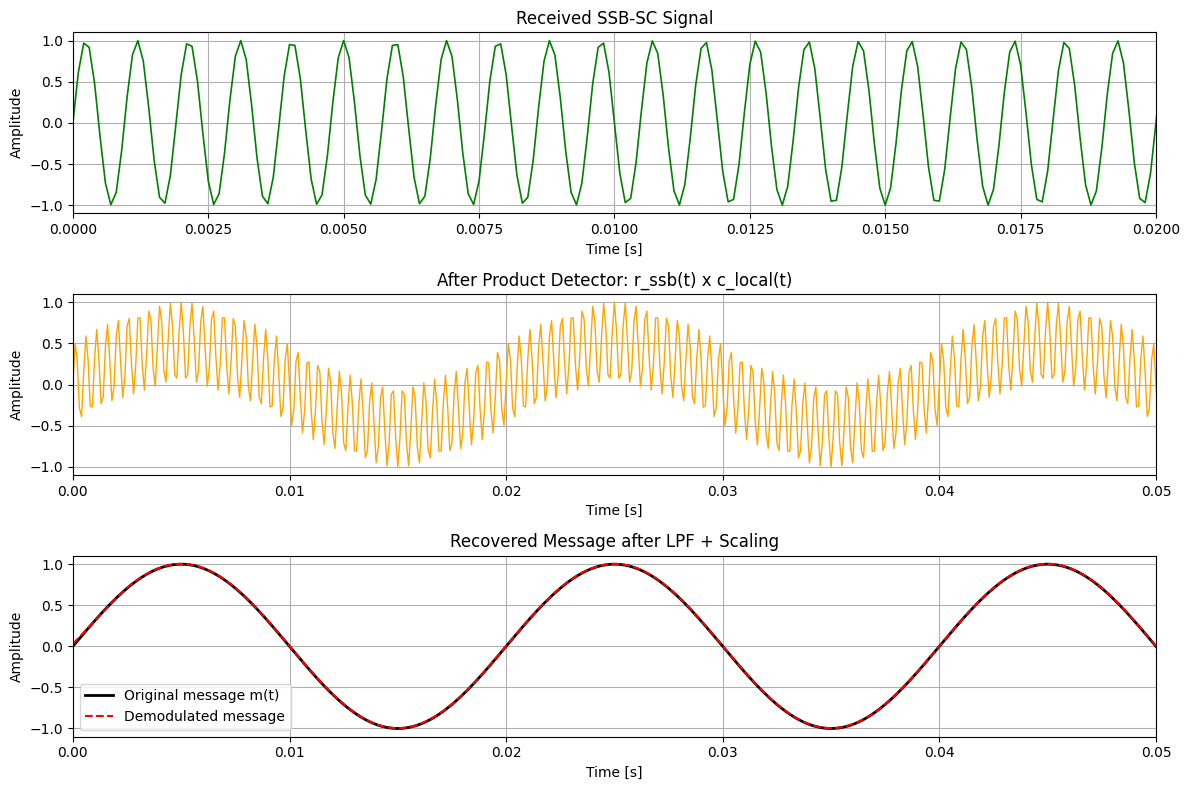

In [ ]:
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

r_ssb = s_usb
# Local carrier at receiver
local_carrier = np.cos(2 * np.pi * fc * t)

# Product detector
mixed_signal = r_ssb * local_carrier

# Define message bandwidth (kept > 300 Hz as required style)
BW_message = 300   # Hz
lpf_cutoff = 350   # Hz

# Butterworth LPF design
order = 4
nyq = 0.5 * Fs
b, a = butter(order, lpf_cutoff / nyq, btype='low', analog=False)

# Zero-phase LPF
baseband = filtfilt(b, a, mixed_signal)

# Scaling and shifting according to need
edge = int(0.01 * Fs)
valid = slice(edge, -edge if edge > 0 else None)
scale = np.dot(m_t[valid], baseband[valid]) / np.dot(baseband[valid], baseband[valid])
demod_final = scale * baseband
demod_final = demod_final - np.mean(demod_final)

# Performance metrics
mse = np.mean((m_t[valid] - demod_final[valid]) ** 2)
corr = np.corrcoef(m_t[valid], demod_final[valid])[0, 1]

print('SSB-SC Synchronous Demodulation Metrics:')
print(f'LPF cutoff = {lpf_cutoff} Hz, Filter order = {order}')
print(f'Scaling factor = {scale:.4f}')
print(f'MSE = {mse:.8f}')
print(f'Correlation = {corr:.4f}')

# Essential plots only
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, r_ssb, 'g', linewidth=1.2)
plt.title('Received SSB-SC Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.02)
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, mixed_signal, color='orange', linewidth=1.0)
plt.title('After Product Detector: r_ssb(t) x c_local(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, m_t, 'k', linewidth=2, label='Original message m(t)')
plt.plot(t, demod_final, 'r--', linewidth=1.5, label='Demodulated message')
plt.title('Recovered Message after LPF + Scaling')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Observations (SSB-SC Demodulation)

1. Product detection generates a low-frequency message component and a high-frequency component around `2fc`.
2. The low-pass Butterworth filter effectively removes high-frequency terms and retains baseband information.
3. After scaling and DC correction, the recovered waveform follows the original message closely.
4. Minor differences near boundaries are due to filter transient effects.

### Analysis / Discussion

1. SSB-SC has no carrier transmission, so coherent (synchronous) detection is required at the receiver.
2. Correct frequency and phase alignment of the local carrier is important for accurate recovery.
3. LPF cutoff should be higher than message bandwidth and much lower than carrier-region frequencies to isolate baseband.
4. Any carrier mismatch or non-ideal sideband filtering increases reconstruction error.

### Conclusion

Synchronous demodulation successfully recovered the message from the SSB-SC signal. The product detector plus low-pass filtering restored baseband content, and scaling/shift correction improved amplitude matching. The close overlap between original and demodulated signals, together with low MSE and high correlation, confirms correct SSB-SC demodulation behavior.
